# Negyedik gyakorlat: Képelemzés kevésbé kezdőknek

## Ismétlés

A múlt órán megbeszéltük, hogy a digitális képeinket, amiket [CCD](https://hu.wikipedia.org/wiki/CCD) vagy [CMOS](https://en.wikipedia.org/wiki/Active-pixel_sensor) szenzorokkal készítünk, hogyan dolgozhatók fel számítógéppel. Beszéltünk a különböző színterekről, mind például az RGB (vagy a testvére, a BGR) és a HSV. A mai gyakorlatunkon ezeket az ismereteket kicsit bővítve alkalmazásokat mutatunk arra, hogy hogyan tudjátok használatba venni a megszerzett OpenCV-s tudásotokat.

## Az új dolog: videó

Képfeldolgozásnál izgalmasabb videót feldolgozni: használjuk saját webkameránkat ahhoz, hogy felvételt készítsünk, amit aztán manipulálhatunk. Ebben segít az alábbi kódrészlet:

In [1]:
import numpy as np
import cv2

# több kamera esetén a szám jelöli a kamerát - ha -1 van ott akkor az utolsó kamera lesz akitiválva
cap = cv2.VideoCapture(0)

# végtelen ciklus inítása a képek beolvasására
# fúj fúj végtelen ciklus
while(True):
    # a videocapture read függvényével megkaphatjuk a képet
    ret, frame = cap.read()
    
    # ha kiíratjuk háthatjuk, hogy a ret azt adja meg, hogy sikerült-e olvasni
    # print(ret)

    # Csináljunk szürkeárnyalatos képet!
    # Múlt órai átalakítás
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # az OpenCV beépített megjelenítőjét használhatjuk, ezzel a legkönnyebb megnézni.
    cv2.imshow('frame',frame)
    
    # várunk egy 'q'-ra a kilépéshez a ciklusból
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# A kamerát elengedi, nem fog a led mellette tovább világítani.
cap.release()
# Ha sok ablak lenne, ez a leghasznosabb parancs 
# Érdemes megpróbálni lekapcsolni kézzel az ablakokat még futás közben - elég nehéz
cv2.destroyAllWindows()

## Kiíratások

Az OpenCV segítségével nem csak képeket tudunk elemezni, hanem képeket átalakítani is tudunk: rájuk is írkálhatunk például. Kezdjük azzal, hogy kiíratjuk, hány FPS-en fut a programunk. Az 'FPS' moziakszót biztosan nem kell bemutatni senkinek: a kettő egyértelmű jelentés közül itt most nem a CS1.6-ra gondolunk, hanem [erre](https://en.wikipedia.org/wiki/Frame_rate).

In [2]:
import numpy as np
import cv2
import time #a timestamp lekérdezéséhez

cap = cv2.VideoCapture(0)

#az elején is legyen vmi.
ts0 = time.time()

while(True):
    ret, frame = cap.read()
    #mennyi időbe telt a ciklus? Ezzel osszuk el az 1s-t.
    ts1 = time.time()
    fps = 1/(ts1-ts0)
    
    #kezdjük újra az időmérést!
    ts0 = ts1
    
    #most tegyük ki a képernyőre! Keressünk rá a doksiban!
    fpsStr = 'FPS: '+str(fps)
    cv2.putText(frame, fpsStr, (10,120), cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0),2,cv2.LINE_AA)
    
    cv2.imshow('frame', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

In [4]:
#érdekes lehet: plottoljuk ki, hogy hogyan alakul az FPS-ünk az időben + írjunk ki átlagértéket is.
import numpy as np
import cv2
import time #a timestamp lekérdezéséhez

cap = cv2.VideoCapture(0)

fpsVals = []

#az elején is legyen vmi.
ts0 = time.time()

while(True):
    ret, frame = cap.read()
    #mennyi időbe telt a ciklus? Ezzel osszuk el az 1s-t.
    ts1 = time.time()
    fps = 1/(ts1-ts0)
    fpsVals.append(fps)
    
    #kezdjük újra az időmérést!
    ts0 = ts1
    
    #most tegyük ki a képernyőre! Keressünk rá a doksiban!
    fpsStr = 'FPS: '+str(fps)
    cv2.putText(frame, fpsStr, (10,120), cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0),2,cv2.LINE_AA)
    
    avgFpsStr = 'Average FPS: '+str(np.average(fpsVals))
    cv2.putText(frame, avgFpsStr, (10,180), cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0),2,cv2.LINE_AA)
    
    cv2.imshow('frame', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

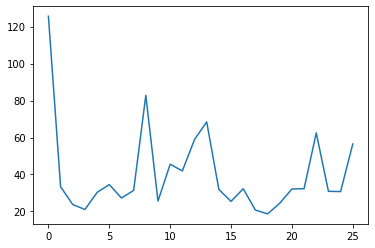

In [5]:
#plottoljunk!
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(fpsVals[::5])
#minimum, maximum, medián...

## 1. Feladat: Keressünk meg valami színeset!

A múlt órán tanult thresholdinggal kell dolgoznunk. Segítségül: itt van egy szürkeárnyalatos kép thresholdozása:


In [6]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

while(True):
    ret, frame = cap.read()
    #szürkeárnyalatos
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(frame,127,255,cv2.THRESH_BINARY)
    cv2.imshow('frame',thresh1)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

Ez nem teljesen jó nekünk; csak fekete-fehér képekkel illik így csinálni. Színes képeknél segítségünkre lesz a `cv2.inrange` függvény.

In [7]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

ret, frame = cap.read()

#BGR->HSV
imgHSV = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

#Mi lehet piros? Két szélső határ

lower_red = np.array([150, 0, 0])
upper_red = np.array([200, 255, 255])

#Maszk elkészítése
mask = cv2.inRange(imgHSV, lower_red, upper_red)

#Maszk alkalmazása a képre
frameSelected = cv2.bitwise_and(frame, frame, mask=mask)

cv2.imshow('tresholdedImg',frameSelected)
cv2.imshow('mask',mask)

cv2.waitKey(0)    
cap.release()
cv2.destroyAllWindows()

In [4]:
### kidolgozva ###

import numpy as np
import cv2

cap = cv2.VideoCapture(0)

while(True):
    ret, frame = cap.read()
    
    #BGR->HSV
    imgHSV = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    #Mi lehet piros? Két szélső határ

    lower_red = np.array([150, 0, 0])
    upper_red = np.array([200, 255, 255])

    #Maszk elkészítése
    mask = cv2.inRange(imgHSV, lower_red, upper_red)

    #Maszk alkalmazása a képre
    frameSelected = cv2.bitwise_and(frame, frame, mask=mask)
    cv2.imshow('frame',frameSelected)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

#kérdés: milyen részeket tudunk csak kiválasztani a HSV-ből?

## Morfológiai átalakítások

Biztosan észrevettétek, hogy a kicsi, minket nem érdeklő régiókat is kiválasztott az algoritmusunk. Javíthatnánk ezen úgy, hogyha valahogy elintéznénk, hogy csak a nagy területű objektumok kerüljenek rá a maszkra. Szerencsére erre is van eszközünk; a `cv2` [morfológiai átalakító függvényei](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html) a segítségünkre lesznek. Kezdjük azzal, hogy a kicsi, egyedülálló pixeleket eltüntetjük: ez az "erodálás".

In [8]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

while(True):
    ret, frame = cap.read()
    
    #BGR->HSV
    imgHSV = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    #Mi lehet piros? Két szélső határ

    lower_red = np.array([150, 0, 0])
    upper_red = np.array([200, 255, 255])

    #Maszk elkészítése
    mask = cv2.inRange(imgHSV, lower_red, upper_red)
    
    #Maszk erodálása
    #kernel init
    kernel = np.ones((5,5), np.uint8)
    #erode
    maskEroded = cv2.erode(mask, kernel, iterations = 3)

    #Maszk alkalmazása a képre
    frameSelected = cv2.bitwise_and(frame, frame, mask=mask)
    cv2.imshow('frame',mask)
    cv2.imshow('orig', frame)
    cv2.imshow('eroded', maskEroded)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

#dilate és closing


## Mecha alapjai - és a diszkrét konvolúció

Akinek régen volt az általános, átnézzük azért, hogy mit is jelent, és megnézzük az általános alakot is. A konvolúció (diszkrét és folytonos is) egy olyan művelet, amely $f$ és $g$ függvények egymásra hatását fejezi ki: megmutatja, hogy az egyik függvényt a másikon "végigtolva" milyen időfüggvényt kapok. A konvolvált $h$ függvényt a következő "konvolúciós integrál" adja:
$$h(t)=\int_{-\infty}^{\infty}f(\tau)*g(t-\tau)d\tau$$
Mi is történik ebben a kifejezésben? Azt jelenti, hogy $h(t)$ időfüggvény egy $t$ időpillanatbeli értékének kiszámításához $g$ t körüli részeinek értékeit mind megszorozzuk $f$ megfelelő értékeivel. Szemléltető ábra:

![kep1](http://ertedmar.hu/assets/content/konvolucio/konvolucio_animation2.gif)

Általában mind $f$, mind $g$ csak egy szűk intervallumon nem nulla - ezért nem kell folyton improprius integrálokkal varázsolni. Diszkrét időben még egyszerűbb ez az elképzelés.

![kep2](https://i.stack.imgur.com/0RTyh.png)

De mihez is lehet ennek köze? Nézzük meg alaposan a 2. órán írt kódot - találunk egy diszkrét konvolúciót! Ez a mozgó átlag. (egy $n$ elemből álló, $1/n$ értékekkel feltöltött vektor konvolúciós integrálja bármely $a$ vektorral $a$ mozgó átlaga $n$ elemenként számítva.

Mivel ezt a mozgó átlagot két, 1D-s vektort összeműveletelve kaptuk, érezzük, hogy akár ki is terjeszthetjük $n$ dimenzióra a konvolúciót - de most maradjuk csak meg 2D-ben. Mit jelentene ez 2D-ben? Legyenek $A$ és $K$ kvadratikus mátrixok (ahol $A$ általában jóval több sorral/oszloppal rendelkezik, mint $K$, amit "kernel"-nek is hívunk) számoljuk ki $A$ minden eleménél a $K$ transzponáltjával vett "súlyozott mozgó átlagot" és kész is vagyunk! [Itt](http://www.songho.ca/dsp/convolution/convolution2d_example.html) végig van csinálva egy példa két 3x3-as mátrixra, ebből biztosan érthető.

## 1 D konvolúció

Kicsit siettünk a második órán, de talán emlékeztek, hogy volt szó jelek simításáról és a mozgó átlagról. Erre teljesen jó egy konvolúció is!

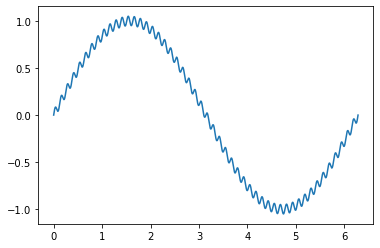

In [2]:
import matplotlib.pyplot as plt
import numpy as np
# legyen egy zajos sin fg
num_of_pts=10000

time=np.linspace(0,2*np.pi, num_of_pts)
sign=np.sin(time)+0.05*np.sin(50*time) #a kód így nem egészen jó. módosítsátok úgy, hogy valóban "szőrös" legyen a jel!

%matplotlib inline
plt.plot(time, sign)

(8001,)


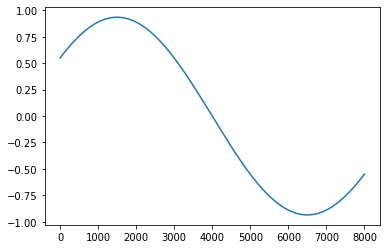

In [5]:
kernel=np.ones(2000)
kernel/=2000 #próbáljátok ki, hogy a kernel méretének változtatása hogy hat!

moving_avg = np.convolve(sign, kernel, mode='valid')
%matplotlib inline
plt.plot(moving_avg)
print(moving_avg.shape)

## 2D Konvolúció és a képelemzés

Nézzük meg, hogy hogyan lesz ugyanez az elképzelés hasznunkra a képeknél! Gondolkozzunk el egy kicsit, és próbáljunk definiálni egy olyan 2D konvolúciót, aminek az alkalmazása egy elmosott képet eredményez!

In [6]:
import numpy as np
import cv2


#most kerítsünk elő egy képet
img=cv2.imread('ballPit.jpg', 0)

#kis downsampling, hogy elférjen a képernyőn
img = img[::2, ::2]


cv2.imshow('Szürkeárnyalatos', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
#keressünk rá numpy convolve doksira - sajna ez csak 1D cuccosokat tud! Scipy segítségünkre lesz.
from scipy import signal

#definiáljuk a kernelt - legyen ez egy rakat float 1/n.
kernel = np.ones((10,10))
kernel = kernel/100
print(kernel)

blur = signal.convolve2d(np.asarray(img), kernel, boundary='symm', mode = 'same') #kipróbálni:  mode='full', boundary='fill', fillvalue=0
blur = blur.astype('uint8')


cv2.imshow('Szürkeárnyalatos', img)
cv2.imshow('Szürkeárnyalatos - elmosva', blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]]


### Gauss kernel

Aki dolgozott már Photoshop-al vagy GIMP-el, az biztosan látott már Gauss elmosást. Az előbb láttuk, hogy az elmosás megoldható konvolúcióval: miért kell akkor belekeverni Gausst is?

In [11]:
#elmosás Gaussblur-el

blur2 = cv2.GaussianBlur(img, (13,13), 0)

cv2.imshow('GaussianBlur',blur2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [76]:
#mi van benne, és miért dob hibát, ha páros számmal csinálnám? A válasz: Gauss-eloszlás!
kernel = cv2.getGaussianKernel(5,0)
#hogy lesz ebből mátrix?
kernel2D = np.outer(kernel, kernel.T)
print(kernel)
print(kernel2D)

[[0.0625]
 [0.25  ]
 [0.375 ]
 [0.25  ]
 [0.0625]]
[[0.00390625 0.015625   0.0234375  0.015625   0.00390625]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.0234375  0.09375    0.140625   0.09375    0.0234375 ]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.00390625 0.015625   0.0234375  0.015625   0.00390625]]


## Keressünk éleket!

A képfeldolgozásban egy nagyon gyakori kérdés, hogy hol van egy darab széle, például alkatrészek csoportosításánál. Hogyan tudjuk ezt megoldani az előbb bemutatott 2D konvolúció segítségével? Használjuk az élő kameránk képét!



In [17]:
import numpy as np
import cv2
import scipy.signal as signal

cap = cv2.VideoCapture(0)

while(True):
    ret, frame = cap.read()
    #szürkeárnyalatosra!
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    #downsample
    #frame = frame[::2, ::2]
    
    #elmosás konvolúcióval
    kernel = np.array([[-1,-1,-1],[-1,8,-1], [-1,-1,-1]])
    #vízszintes élek
    #np.array([[1,1,1],[0,0,0], [-1,-1,-1]])
    #függőleges élek
    #np.array([[1,0,-1],[1,0,-1], [1,0,-1]])
    #átlós élek
    #np.array([[1,0,-1],[0,0,0], [-1,0,1]])
    #minen él
    #np.array([[-1,-1,-1],[-1,8,-1], [-1,-1,-1]])
    
    kernel = kernel

    blur = signal.convolve2d(np.asarray(frame), kernel, boundary='symm', mode = 'same') 
    blur = abs(blur)
    blur = blur.astype('uint8')
    
    
    cv2.imshow('frame',blur)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

print(kernel)

[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


## Érdekesség: képek és a mozgás

Nem csak "statikusan" nyerhetünk ki információt egy videó képkockáiból: a képkockákat egymással is összehasonlíthatjuk, hogy valamilyen fogalmunk lehessen a mozgásról pl. Tegyünk is így - viszgáljunk szürkeárnyalatok képkockák közötti különbséget! 

In [9]:
import numpy as np
import cv2
import time

cap = cv2.VideoCapture(0)
firstFrame = True
while(True):
    
    ret, frame = cap.read()
    #szürkeárnyalatos
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #valami nem oké? Mossuk el!
    #frame = cv2.GaussianBlur(frame, (31,31),0)
    frame = cv2.blur(frame, (15,15))
    
    if firstFrame:
        prevFrame = frame
        firstFrame = False
    
    diff = abs(frame.astype(np.int8)-prevFrame.astype(np.int8)) #
    
    prevFrame = frame
    
    cv2.imshow('frame',diff)
    time.sleep(0.05) #lehet, hogy kellhet!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()